# Quiver plots


In [17]:
import scipy.io.netcdf as nc
import numpy as np
import matplotlib.pyplot as plt

f = nc.netcdf_file('../io/data/UV500storm.nc', mmap=False)
u = f.variables['u'][0]
v = f.variables['v'][0]
u = np.ma.masked_where(np.abs(u)>=999, u)
v = np.ma.masked_where(np.abs(v)>=999, v)
x = f.variables['lon'][:]
y = f.variables['lat'][:]
vel = np.sqrt(u*u + v*v, where=(np.ma.getmaskarray(u) == False))

f.close()

## Using colormap

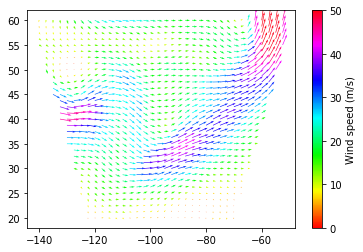

In [21]:
plt.figure()
q = plt.quiver(x, y, u, v, vel, cmap=plt.cm.get_cmap('hsv'), scale=1000)
q.set_clim(0, 50)
cb = plt.colorbar(q)
cb.set_label('Wind speed (m/s)')
plt.show()

## Using reference arrow

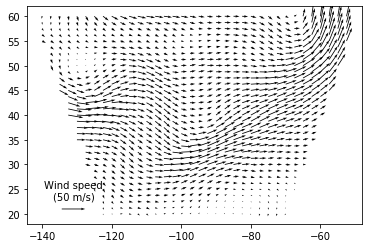

In [20]:
plt.figure()
q = plt.quiver(x, y, u, v, scale=1000)
keys = plt.quiverkey(q, -131, 21, 70, 'Wind speed\n(50 m/s)', coordinates='data')
plt.show()